In [1]:
# Load stored variables
%store -r sales_df

## Can you identify any quarter-over-quarter trends?

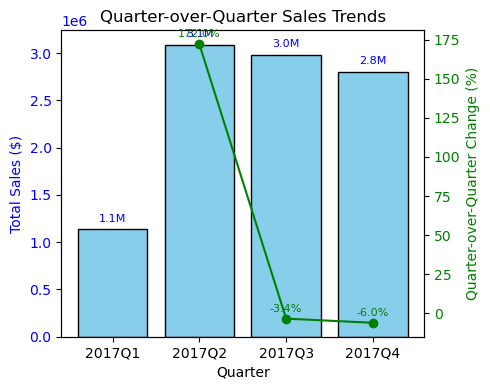

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'close_date' is in datetime format
sales_df['close_date'] = pd.to_datetime(sales_df['close_date'])

# Extract Year and Quarter from 'close_date'
sales_df['year_quarter'] = sales_df['close_date'].dt.to_period('Q')

# Convert the Period to string for plotting
sales_df['year_quarter_str'] = sales_df['year_quarter'].astype(str)

# Calculate total sales per quarter
sales_by_quarter = sales_df[sales_df['deal_stage'] == 'Won'].groupby('year_quarter_str')['close_value'].sum()

# Calculate the quarter-over-quarter change
quarter_over_quarter_change = sales_by_quarter.pct_change() * 100  # Percentage change

# Plot the total sales per quarter and quarter-over-quarter change
fig, ax1 = plt.subplots(figsize=(5, 4))

# Bar chart for total sales per quarter
bars = ax1.bar(sales_by_quarter.index, sales_by_quarter.values, color='skyblue', edgecolor='black')
ax1.set_xlabel('Quarter')
ax1.set_ylabel('Total Sales ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Add values on top of the bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height + 0.02 * sales_by_quarter.max(),
             f'{height/1e6:,.1f}M', ha='center', va='bottom', fontsize=8, color='blue')

# Create a second y-axis to plot the quarter-over-quarter change
ax2 = ax1.twinx()
ax2.plot(quarter_over_quarter_change.index, quarter_over_quarter_change.values, color='green', marker='o', label='QoQ Change (%)')
ax2.set_ylabel('Quarter-over-Quarter Change (%)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add values on the line chart
for i, value in enumerate(quarter_over_quarter_change.values):
    if not pd.isna(value):  # Skip NaN (first quarter with no previous quarter to compare)
        ax2.annotate(f'{value:,.1f}%', (quarter_over_quarter_change.index[i], value),
                     textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8, color='green')

# Add a title
plt.title('Quarter-over-Quarter Sales Trends')

# Show the plot
plt.tight_layout()
plt.show()

#### Sales have slightly decreased after the second quarter.